# Рекомендательная система на базе датасета **movielens**

Один из наиболее известных датасетов в мире рекомендательных систем - Movielens 25M, содержащий рейтинги к фильмам, оставленные различными пользователями на одноименном сайте https://movielens.org/.

Мы будем использовать мини-версию датасета, содержащую 100 тысяч записей рейтингов фильмов.

## Загрузка данных

Для создания алгоритмов рекомендательной системы, будем использовать библиотеку **surprise**.

Установим её, если она ещё не установлена на компьютер.

In [1]:
!pip install scikit-surprise

     |████████████████████████████████| 11.8MB 4.3MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1617601 sha256=ab629dffa1adc7cc492ebf879c4e5394bb4bb0568134868ce9aba0c8ab807700
  Stored in directory: /root/.cache/pip/wheels/78/9c/3d/41b419c9d2aff5b6e2b4c0fc8d25c538202834058f9ed110d0
Successfully built scikit-surprise


In [2]:
from surprise import Dataset

Загружаем датасет из **surprise**. 

Для этого подтвердите, что вы хотете его скачать, набрав **Y** в появившемся диалоговом окне.  

In [ ]:
IN_COLAB = True

if IN_COLAB:
    data = Dataset.load_builtin('ml-100k')
else:
    # загрузка датасета из архива ml-100k.zip
    !unzip ./ml-100k.zip -d ./data
    from surprise import Reader
    from surprise.dataset import BUILTIN_DATASETS
    data = Dataset.load_from_file('./data/ml-100k/u.data', reader=Reader(**BUILTIN_DATASETS['ml-100k'].reader_params))

## Визуализация данных

Для удобной работы с данными загрузим библиотеку **pandas**

In [4]:
import pandas as pd

Преобразуем данные к формату **pandas DataFrame**, для удобной работы с ними:

In [52]:
df = pd.DataFrame(data.raw_ratings, columns=['userId', 'movieId', 'rating', 'timestamp'])

In [53]:
df.head(10)

,userId,movieId,rating,timestamp
0,196,242,3.0,881250949
1,186,302,3.0,891717742
2,22,377,1.0,878887116
3,244,51,2.0,880606923
4,166,346,1.0,886397596
5,298,474,4.0,884182806
6,115,265,2.0,881171488
7,253,465,5.0,891628467
8,305,451,3.0,886324817
9,6,86,3.0,883603013


*  Колонка **userId** - идентификаторы пользователей сайта movielens;
*  Колонка **movieId** - идентификаторы фильмов;
*  Колонка **rating** - оценки фильмов пользователями по шкале от 1 до 5;
*  Колонка **timestamp** - это время оценки фильма пользователем. Данный формат представления времени показывает, сколько секунд прошло с 1 января 1970 года.

Мы можем посмотреть, сколько уникальных значений находится в каждой из колонок.

In [13]:
df.apply('nunique')

userId         943
movieId       1682
rating           5
timestamp    49282
dtype: int64

Для корректной работы с графиками в python требуется загрузить специальную библиотеку
**matplotlib**, программную библиотеку на языке python для визуализации данных двумерной и трехмерной графикой.

In [14]:
# включим отрисовку графиков непосредственно в ячейках тетрадки
%matplotlib inline

Посмотрим наглядно, как часто в датасете встречаются разные оценки:

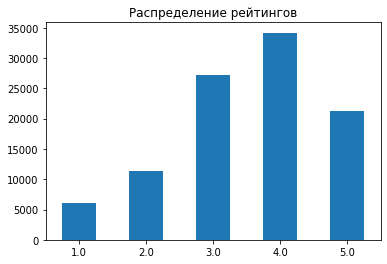

In [15]:
df['rating'].value_counts().sort_index().plot.bar(title='Распределение рейтингов', rot=0);

## Разбиение выборки на обучающую и тестовую

Библиотека **surprise** высокоуровневая, и позволяет нам разбить данные на обучающую и тестовую выборки всего одной функцией **train_test_split()**

In [16]:
from surprise.model_selection import train_test_split

Функция **train_test_split()** принимает на вход два параметра:
*  **data** - данные
*  **test_size** - доля тестовой выборки. Укажем 0,25, чтобы тестовая выборка составляла 25% от всей выборки.

In [23]:
trainset, testset = train_test_split(data, test_size=0.25, random_state=13)

## Построение простой модели

In [18]:
from surprise import SVD, KNNBasic
from surprise import accuracy

Инициализируем алгоритм. Алгоритм SVD - один из самых распространенных методов матричной факторизации (представления матрицы в виде произведения нескольких матриц). Такое представление позволяет анализировать похожие матрицы и раскладывать их на так называемые "компоненты". А так же, восстанавливая матрицы их этих компонент - заполнять недостающие значения (в нашем случае - оценки). Почитать можно здесь: http://www.albertauyeung.com/post/python-matrix-factorization/

In [24]:
algo = SVD()

Тренируем на тренировочной выборке алгоритм.

In [25]:
algo.fit(trainset);

Делаем предсказание на тестовой выборке.

In [26]:
predictions = algo.test(testset)

In [27]:
testset

[('7', '633', 5.0),
 ('422', '287', 3.0),
 ('804', '163', 3.0),
 ('189', '480', 5.0),
 ('238', '546', 3.0),
 ('804', '216', 4.0),
 ('350', '204', 4.0),
 ('708', '993', 4.0),
 ('193', '1078', 4.0),
 ('847', '173', 5.0),
 ('244', '662', 3.0),
 ('592', '1014', 4.0),
 ('6', '15', 3.0),
 ('49', '96', 1.0),
 ('354', '1194', 4.0),
 ('265', '117', 5.0),
 ('233', '193', 4.0),
 ('345', '620', 2.0),
 ('923', '831', 4.0),
 ('833', '1143', 4.0),
 ('588', '443', 3.0),
 ('916', '50', 5.0),
 ('334', '1525', 4.0),
 ('909', '292', 4.0),
 ('697', '713', 5.0),
 ('370', '525', 4.0),
 ('271', '89', 3.0),
 ('458', '116', 4.0),
 ('416', '1495', 3.0),
 ('921', '410', 2.0),
 ('97', '670', 5.0),
 ('286', '288', 5.0),
 ('257', '198', 3.0),
 ('175', '132', 3.0),
 ('315', '187', 4.0),
 ('543', '761', 2.0),
 ('905', '245', 3.0),
 ('313', '231', 2.0),
 ('365', '908', 3.0),
 ('399', '470', 4.0),
 ('578', '272', 2.0),
 ('775', '315', 5.0),
 ('653', '200', 4.0),
 ('405', '1572', 1.0),
 ('498', '175', 5.0),
 ('279', '111

In [28]:
accuracy.rmse(predictions);

RMSE: 0.9384


Написанный выше код можно переписать в одну строчку:

```python
predictions = algo.fit(trainset).test(testset)
```

## Кросс-валидация

Обучая любой алгоритм машинного обучения мы, фактически, "подгоняем" модель под данные, которые ей подаём. Но, если подгонять слишком сильно, то модель переобучится. То есть модель начнёт запоминать ответы вместо того, чтобы выявлять закономерности. 

На графиках ниже точки тренировочной выборки:
*  слева - недообученная модель (большая ошибка на тренировочной выборке; большая ошибка на тестовой выборке)
*  посередине - хорошо обученная модель (маленькая ошибка на тренировочной выборке; маленькая ошибка на тестовой выборке)
*  справа - переобученная модель (очень маленькая или нулевая ошибка на тренировочной выборке; большая ошибка на тестовой выборке)

<p align="center">
  <img src="https://drive.google.com/uc?id=1Eg4Xg4o-lhzrgqNNmNQCtB1RxNJmnmWx" alt="Drawing" style="width: 100px;" width="700"/>
</p>

Таким образом, обучая модель, мы всегда уменьшаем ошибку на тренировочной выборке. Вместе с ошибкой на тренировочной выборке, падает и ошибка на тестовой. Но после какого-то момента, модель начинает переобучатся, и ошибка на тестовой выборке начинает расти, в то время, как ошибка на тренировочной выборке продолжает падать. 

<p align="center">
  <img src="https://drive.google.com/uc?id=1mvU_jJIe07tAoX82qODcpmTBctx0ReuT" alt="Drawing" style="width: 100px;" width="700"/>
</p>

Может получится ситуация, когда мы видим маленькую ошибку нашей модели, и думаем, что она хорошая, но на самом деле она просто переобучилась, и на новых данных покажет плохой результат.

Чтобы избежать такой ситуации можно использовать отложенную выборку. То есть мы разбиваем наши данные на **тренировочную** выборку, **тестовую** выборку и **отложенную** выборку. Соответственно, обучаем модель на тренировочной, в ходе обучения проверяем результат на тестовой выборке, а в конце обучения, чтобы оценить качество модели, ошибку считаем на отложенной выборке.

<p align="center">
  <img src="https://drive.google.com/uc?id=1lZeoYL-KN644_EPsYTyR2EK83tBFgod9" alt="Drawing" style="width: 100px;" width="700"/>
</p>


При таком подходе в обучении модели участвует только тренировочная выборка. Тестовую и отложенную мы используем только для проверки. Если у нас мало данных, отложенная выборка - непозволительная роскошь. 

Другой популярный подход это **кросс-валидация** или скользящий контроль. Суть метода заключается в том, что мы дераем не одно разбиение датесета, а несколько разбиений таким образом, чтобы все данные использовались и в обучении и для проверки. Такие разбиения называются **фолдами**. 

Преимущества такого подхожа в том, что мы используем все данные для обучения. Также это позволяет оценить устойчивость модели. Если ошибки полученные на разных фолдах сильно отличаются, что модель неустойчива.
Недостаток метода в том, что нам нужно обучать не одну модель, а несколько (столько, сколько мы выбрали фолдов).

На практике часто выбирают 5 фолдов.

<p align="center">
  <img src="https://drive.google.com/uc?id=1C9eHgCi30X08XaSScmjqIOT3ayBtBiFw" alt="Drawing" style="width: 100px;" width="300"/>
</p>

In [29]:
from surprise.model_selection import cross_validate

Используем функцию **cross_validate** из модуля **model_selection** библиотеки **surprise**.

Функция принимает на вход:
*  algo - алгоритм, который будем обучать.
*  data - исходные данные. Обратите внимание, что данные передаём не разбитые на выборки.
*  measures - метрики ошибок по которым мы хотим сравнивать модели. Мы передаём среднеквадратичную ошибку и среднюю ошибку.
* cv - количество фолдов.
*  verbose - параметр указывающий хотим ли мы увидеть подробный результат выполнения функции.

In [30]:
algo = SVD()
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9366  0.9350  0.9335  0.9322  0.9414  0.9357  0.0032  
MAE (testset)     0.7394  0.7347  0.7368  0.7348  0.7396  0.7371  0.0021  
Fit time          5.24    4.60    4.63    4.87    4.64    4.80    0.24    
Test time         0.28    0.25    0.19    0.16    0.15    0.21    0.05    


{'fit_time': (5.239839792251587,
  4.602002143859863,
  4.632915496826172,
  4.868505477905273,
  4.635716438293457),
 'test_mae': array([0.73941643, 0.73472611, 0.73675464, 0.73475665, 0.73964619]),
 'test_rmse': array([0.93662048, 0.93497663, 0.93354553, 0.93221862, 0.94137674]),
 'test_time': (0.27783918380737305,
  0.2538013458251953,
  0.19495201110839844,
  0.15787553787231445,
  0.15169382095336914)}

В результате получаем значения ошибок на каждом из фолдов, а также их среднее и стандартное отклонение (СО). Маленькое СО, как в нашем случае, говорит об устойчивости модели.

Дополнительно мы видим время тренировки и время предсказания модели на каждом из фолдов.

## Поиск по сетке (Grid search)

Теперь, когда у нас есть надёжный способ оценивать качество модели, мы можем перейти к подбору гиперпараметров модели, т.е. параметров, которые нужно указывать вручную, потому что нельзя обучить во время тренировки модели.

Метод поиска по сетке очень прост. Мы передаём варианты каждого из параметров, который мы хотим перебрать, а функция перебирает все возможные варианты переданных параметров. Например, на картинке ниже перебираются параметры "регуляризация" и "скорость обучения".

<p align="center">
  <img src="https://drive.google.com/uc?id=1xs9z_Zo1A2QinErKYEB-bp6eGnLWodbO" alt="Drawing" style="width: 100px;" width="700"/>
</p>

In [31]:
from surprise.model_selection import GridSearchCV

Зададим параметры, которые хотим перебрать:
* n_epochs - количество эпох обучения.
* lr_all - скорость обучения.
* reg_all - регуляризация.

In [32]:
param_grid = {
    'n_epochs': [5, 10], 
    'lr_all': [0.002, 0.005],
    'reg_all': [0.4, 0.6]
}

Для перебора по сетке используем функцию **GridSearchCV**. 
На вход подаём:
* алгоритм.
* параметры, которые хотим перебрать.
* метрики ошибок.
* количество фолдов для кросс-валидации.

Обратите внимание, что функция выполняет кросс-валидация автоматически.

In [33]:
%%time
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=5)
gs.fit(data)

CPU times: user 1min 19s, sys: 871 ms, total: 1min 20s
Wall time: 1min 20s


Выведем лучший результат и лучшие найденные параметры.

In [34]:
print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

0.9605975364820083
{'n_epochs': 10, 'lr_all': 0.005, 'reg_all': 0.4}


Поскольку для того, чтобы перебрать очередной вариант параметров, нам нужно каждый раз обучать модель, такой поиск является ресурсозатратным и занимает много времени. По этой причине мы не можем перебрать большое количество комбинаций. Но, перебрав всего несколько, мы можем недостаточно приблизиться к оптимальному варианту.

На практике мы обычно перебираем сначала несколько вариантов из большого диапазона параметров, а потом начинаем сужать диапазон, чтобы найти лчшую комбинацию. Например, если мы перебрали некоторый параметр *а* в диапазоне от 0.1 до 1 с шагом 0.1, т.е **[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]**, и лучшим оказался параметр **0.4**, то на следующей итерации мы можем попробовать перебрать диапазон от 0.3 до 0.5 с шагом 0.025, т.е. **[0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5]**.

**Задание:** Попробуйте найти параметры **n_epochs**, **lr_all**, **reg_all** для алгоритма **SVD** с помощью фукнции **GridSearchCV**, которые будут работать лучше, чем показанные в примере.

In [ ]:
# Ваш код здесь...
